<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(0_4)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_0.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_0.4_n250.csv',
 'data_multi_delta_0.4_n120.csv',
 'data_multi_delta_0.4_n60.csv',
 'data_multi_delta_0.4_n30.csv',
 'data_multi_delta_0.4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0.4_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,23.632717,1.112655,34.745372,33.736845,1.008527
1,0.0,1.0,20.799732,0.885117,31.684849,30.919573,0.765276
2,0.0,2.0,24.304224,0.696459,35.000683,34.404627,0.596056
3,0.0,3.0,90.751100,-1.680082,99.071018,100.482956,-1.411939
4,0.0,4.0,58.550978,-3.439391,65.111587,68.461432,-3.349845
...,...,...,...,...,...,...,...
119995,999.0,115.0,88.702432,0.941333,99.643766,98.460975,1.182791
119996,999.0,116.0,63.986265,-0.276159,73.710106,73.929905,-0.219799
119997,999.0,117.0,21.545657,-2.208793,29.336864,31.807133,-2.470269
119998,999.0,118.0,94.233319,-0.890975,103.342345,103.950441,-0.608096


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,23.632717,1.112655,34.745372,33.736845,1.008527
1,0.0,1.0,20.799732,0.885117,31.684849,30.919573,0.765276
2,0.0,2.0,24.304224,0.696459,35.000683,34.404627,0.596056
3,0.0,3.0,90.751100,-1.680082,99.071018,100.482956,-1.411939
4,0.0,4.0,58.550978,-3.439391,65.111587,68.461432,-3.349845
...,...,...,...,...,...,...,...
119995,999.0,115.0,88.702432,0.941333,99.643766,98.460975,1.182791
119996,999.0,116.0,63.986265,-0.276159,73.710106,73.929905,-0.219799
119997,999.0,117.0,21.545657,-2.208793,29.336864,31.807133,-2.470269
119998,999.0,118.0,94.233319,-0.890975,103.342345,103.950441,-0.608096


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    23.632717  1.112655   34.745372   33.736845  1.008527
      1.0    20.799732  0.885117   31.684849   30.919573  0.765276
      2.0    24.304224  0.696459   35.000683   34.404627  0.596056
      3.0    90.751100 -1.680082   99.071018  100.482956 -1.411939
      4.0    58.550978 -3.439391   65.111587   68.461432 -3.349845
...                ...       ...         ...         ...       ...
999.0 115.0  88.702432  0.941333   99.643766   98.460975  1.182791
      116.0  63.986265 -0.276159   73.710106   73.929905 -0.219799
      117.0  21.545657 -2.208793   29.336864   31.807133 -2.470269
      118.0  94.233319 -0.890975  103.342345  103.950441 -0.608096
      119.0  20.362320  0.650566   31.012885   30.632657  0.380228

[120000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    23.632717  1.112655   34.745372   33.736845  1.008527
      1.0    20.799732  0.885117   31.684849   30.919573  0.765276
      2.0    24.304224  0.696459   35.000683   34.404627  0.596056
      3.0    90.751100 -1.680082   99.071018  100.482956 -1.411939
      4.0    58.550978 -3.439391   65.111587   68.461432 -3.349845
...                ...       ...         ...         ...       ...
999.0 115.0  88.702432  0.941333   99.643766   98.460975  1.182791
      116.0  63.986265 -0.276159   73.710106   73.929905 -0.219799
      117.0  21.545657 -2.208793   29.336864   31.807133 -2.470269
      118.0  94.233319 -0.890975  103.342345  103.950441 -0.608096
      119.0  20.362320  0.650566   31.012885   30.632657  0.380228

[120000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,23.632717,1.112655,34.745372,33.736845,1.008527
1,0.0,1.0,20.799732,0.885117,31.684849,30.919573,0.765276
2,0.0,2.0,24.304224,0.696459,35.000683,34.404627,0.596056
3,0.0,3.0,90.751100,-1.680082,99.071018,100.482956,-1.411939
4,0.0,4.0,58.550978,-3.439391,65.111587,68.461432,-3.349845
...,...,...,...,...,...,...,...
119995,999.0,115.0,88.702432,0.941333,99.643766,98.460975,1.182791
119996,999.0,116.0,63.986265,-0.276159,73.710106,73.929905,-0.219799
119997,999.0,117.0,21.545657,-2.208793,29.336864,31.807133,-2.470269
119998,999.0,118.0,94.233319,-0.890975,103.342345,103.950441,-0.608096


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    23.632717  1.112655   34.745372   33.736845  1.008527
      1.0    20.799732  0.885117   31.684849   30.919573  0.765276
      2.0    24.304224  0.696459   35.000683   34.404627  0.596056
      3.0    90.751100 -1.680082   99.071018  100.482956 -1.411939
      4.0    58.550978 -3.439391   65.111587   68.461432 -3.349845
...                ...       ...         ...         ...       ...
999.0 115.0  88.702432  0.941333   99.643766   98.460975  1.182791
      116.0  63.986265 -0.276159   73.710106   73.929905 -0.219799
      117.0  21.545657 -2.208793   29.336864   31.807133 -2.470269
      118.0  94.233319 -0.890975  103.342345  103.950441 -0.608096
      119.0  20.362320  0.650566   31.012885   30.632657  0.380228

[120000 rows x 5 columns]

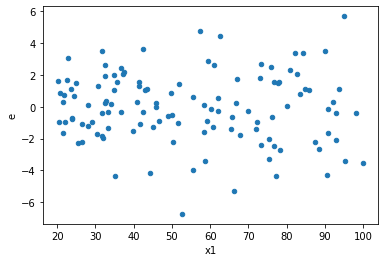

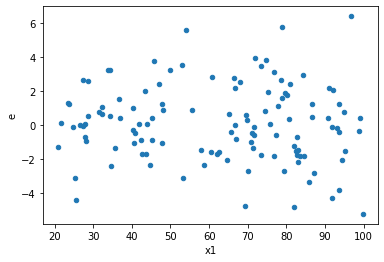

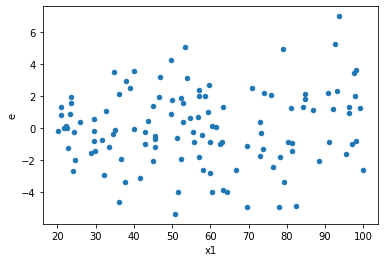

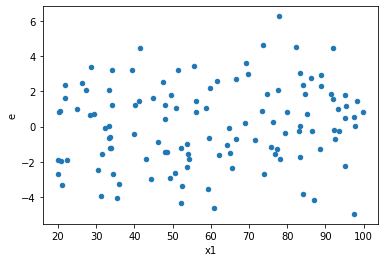

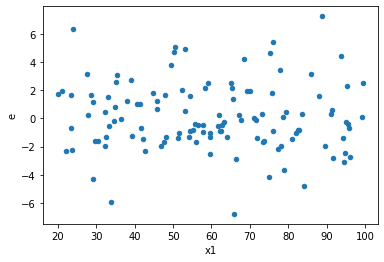

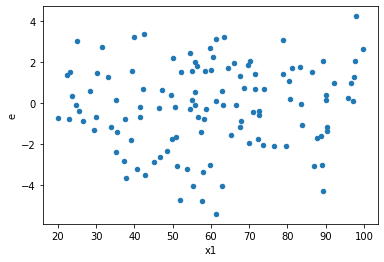

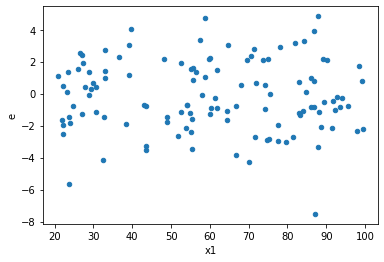

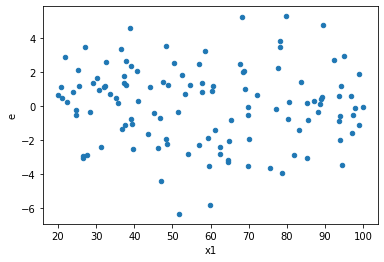

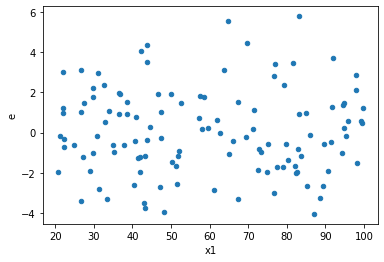

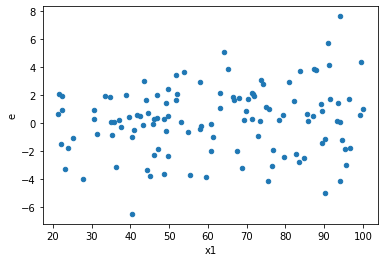

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)

    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,47.0,47.0,133.91517076712591,286.16556299924355,2.8492589524920406,6.088628999983905,2.13691668658569,0.010491685380666915,0.9947541573096665,0.005245842690333458,Reject001=1 : Homoscedasticity
1.0,47.0,47.0,175.1343593158157,290.40854003102044,3.726262964166291,6.178905107042988,1.6582042562381123,0.08627791191698586,0.9568610440415071,0.04313895595849293,Reject001=1 : Homoscedasticity
2.0,47.0,47.0,169.72415359623562,287.02782509595187,3.611152204175226,6.106975002041529,1.6911430636960203,0.07485502832145952,0.9625724858392702,0.03742751416072976,Reject001=1 : Homoscedasticity
3.0,47.0,47.0,222.13051649969157,249.14628277379418,4.726181202121097,5.300984739867961,1.121621138328106,0.6956232258932347,0.6521883870533827,0.34781161294661733,Reject001=1 : Homoscedasticity
4.0,47.0,47.0,274.4137117872085,355.47650129568774,5.838589612493798,7.563329814801866,1.295403567775573,0.37817092539884367,0.8109145373005782,0.18908546269942184,Reject001=1 : Homoscedasticity
6.0,47.0,47.0,196.78097935625857,269.94579567817595,4.186829348005501,5.743527567620765,1.371808375795597,0.2820746277873787,0.8589626861063107,0.14103731389368934,Reject001=1 : Homoscedasticity
7.0,47.0,47.0,184.12093642614326,240.40889170765763,3.917466732471133,5.115082802290588,1.3057118672872559,0.3637824208878211,0.8181087895560895,0.18189121044391054,Reject001=1 : Homoscedasticity
8.0,47.0,47.0,203.4409806256676,214.74948536493542,4.328531502673779,4.569137986487988,1.0555861690426842,0.8536701149025103,0.5731649425487448,0.42683505745125516,Reject001=1 : Homoscedasticity
9.0,47.0,47.0,198.08540170488413,331.9026690683945,4.214583014997535,7.061758916348819,1.6755534037933641,0.08006767808935988,0.9599661609553201,0.04003383904467994,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,47.0,47.0,133.91517076712591,286.16556299924355,2.8492589524920406,6.088628999983905,2.13691668658569,0.010491685380666915,Reject001=1 : Homoscedasticity
1.0,47.0,47.0,175.1343593158157,290.40854003102044,3.726262964166291,6.178905107042988,1.6582042562381123,0.08627791191698586,Reject001=1 : Homoscedasticity
2.0,47.0,47.0,169.72415359623562,287.02782509595187,3.611152204175226,6.106975002041529,1.6911430636960203,0.07485502832145952,Reject001=1 : Homoscedasticity
3.0,47.0,47.0,222.13051649969157,249.14628277379418,4.726181202121097,5.300984739867961,1.121621138328106,0.6956232258932347,Reject001=1 : Homoscedasticity
4.0,47.0,47.0,274.4137117872085,355.47650129568774,5.838589612493798,7.563329814801866,1.295403567775573,0.37817092539884367,Reject001=1 : Homoscedasticity
5.0,47.0,47.0,182.53197604155704,148.51726787842318,3.8836590647139797,3.159941869753685,0.8136506879463699,0.48234701396475527,Reject001=1 : Homoscedasticity
6.0,47.0,47.0,196.78097935625857,269.94579567817595,4.186829348005501,5.743527567620765,1.371808375795597,0.2820746277873787,Reject001=1 : Homoscedasticity
7.0,47.0,47.0,184.12093642614326,240.40889170765763,3.917466732471133,5.115082802290588,1.3057118672872559,0.3637824208878211,Reject001=1 : Homoscedasticity
8.0,47.0,47.0,203.4409806256676,214.74948536493542,4.328531502673779,4.569137986487988,1.0555861690426842,0.8536701149025103,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      914
Reject001=0 : Heteroscedasticity     86
Name: Result_test, dtype: int64